In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/SF_LAB_2/Image\ Watermarking/

/content/drive/MyDrive/SF_LAB_2/Image Watermarking


In [3]:
!pwd
!ls

/content/drive/MyDrive/SF_LAB_2/Image Watermarking
 234.png		     lena512.bmp
 baboon.png		    'Live FLAT_INDEX_LEFT_1_1_1.jpg'
 cover_1.png		    'Live FLAT_INDEX_LEFT_1_1_2_2.jpg'
 cover_image.jpg	    'Live FLAT_INDEX_LEFT_1_1_2_3.jpg'
 crop.jpg		    'Live FLAT_INDEX_LEFT_1_1_2.jpg'
 crop.png		    'Live FLAT_INDEX_LEFT_1_1.jpg'
'Image Watermarking.gdoc'   'Live FLAT_INDEX_LEFT_1.jpg'
'Image Watermarking.ipynb'  'Live FLAT_INDEX_LEFT.bmp'
 index_33_12.jpg	     output.txt
 index_33_1.jpg		     watermark.jpg
 index_33.png


In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy

<Figure size 432x288 with 0 Axes>

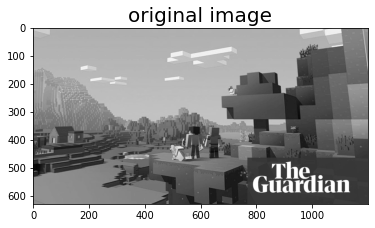

(630, 1200)


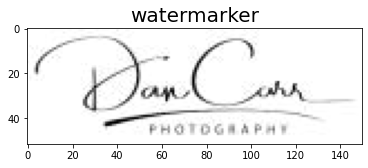

(52, 150)


In [5]:
cv_image = cv2.imread('cover_image.jpg')
#cv_image = cv2.imread('lena512.bmp')
#cv_image = cv2.imread('baboon.png') 
#marker = cv2.imread('Live FLAT_INDEX_LEFT_1_1_2_3.jpg')
marker = cv2.imread('watermark.jpg')


cv_image_grayscale = cv2.cvtColor(cv_image, cv2.COLOR_RGB2GRAY); 
marker_grayscale = cv2.cvtColor(marker, cv2.COLOR_RGB2GRAY); 
#cv2_imshow(cv_image_grayscale); print(cv_image_grayscale.shape)
#cv2_imshow(cv_image_1); print(cv_image_1.shape)
plt.gray()
plt.figure()
plt.imshow(cv_image_grayscale),plt.title('original image', size=20),plt.show(), print(cv_image_grayscale.shape)
plt.imshow(marker_grayscale), plt.title('watermarker', size=20),plt.show(), print(marker_grayscale.shape)
plt.show()

In [6]:
from scipy.fftpack import dct, idct

# implement 2D DCT
def dct2(a):
    return dct(dct(a.T, norm='ortho').T, norm='ortho')

# implement 2D IDCT
def idct2(a):
    return idct(idct(a.T, norm='ortho').T, norm='ortho')    

(630, 1200)
(630, 1200)


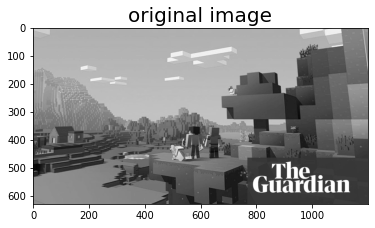

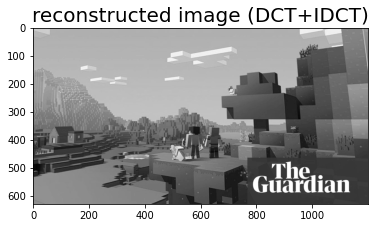

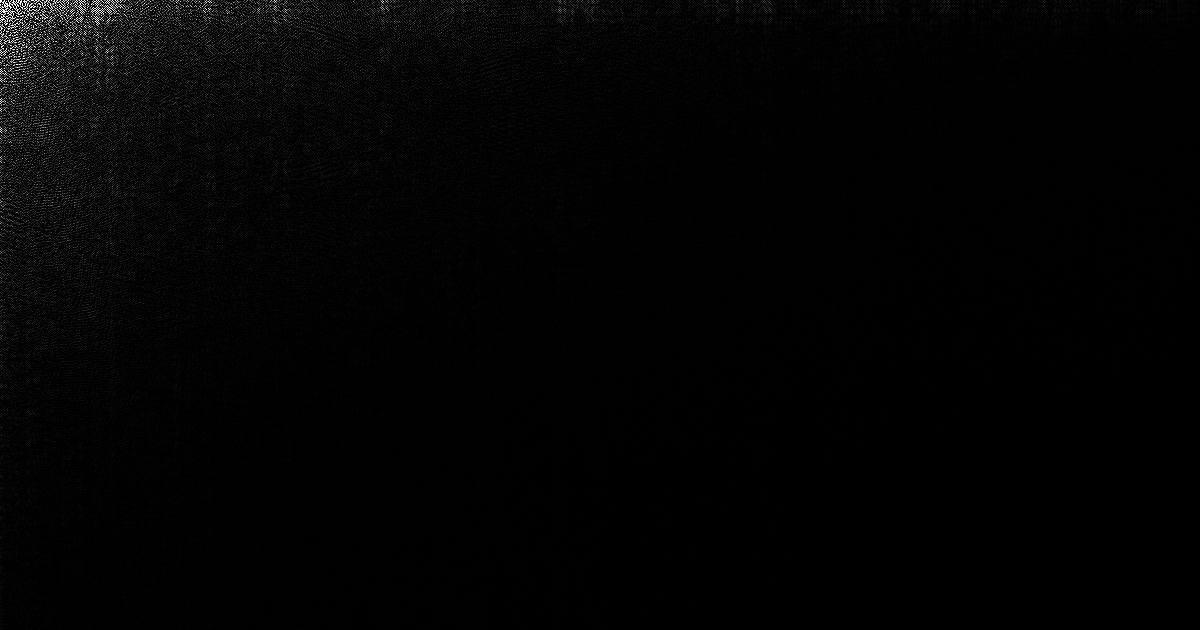

In [7]:
cv_dct = dct2(cv_image_grayscale)
print(cv_dct.shape)
cv_idct = idct2(cv_dct)
print(cv_idct.shape)

plt.figure()
plt.imshow(cv_image_grayscale),plt.title('original image', size=20),plt.show()
plt.imshow(cv_idct), plt.title('reconstructed image (DCT+IDCT)', size=20),plt.show()
cv2_imshow(cv_dct)

(52, 150)
(52, 150)
52 150


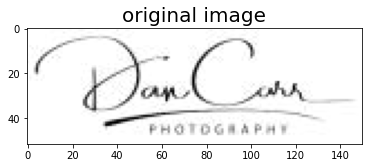

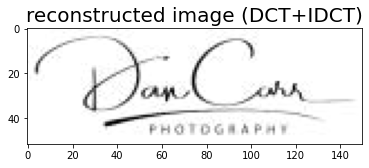

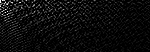

In [8]:
mkr_dct = dct2(marker_grayscale)
print(mkr_dct.shape)
mkr_idct = idct2(mkr_dct)
print(mkr_idct.shape)
height = mkr_dct.shape[0]
width = mkr_dct.shape[1]
print(height,width)
plt.figure()
plt.imshow(marker_grayscale),plt.title('original image', size=20),plt.show()
plt.imshow(mkr_idct), plt.title('reconstructed image (DCT+IDCT)', size=20),plt.show()
cv2_imshow(mkr_dct)

In [9]:
import numpy as np

def zigzag(input):
    #initializing the variables
    #----------------------------------
    h = 0
    v = 0

    vmin = 0
    hmin = 0

    vmax = input.shape[0]
    hmax = input.shape[1]
    
    #print(vmax ,hmax )

    i = 0

    output = np.zeros(( vmax * hmax))
    #----------------------------------

    while ((v < vmax) and (h < hmax)):
    	
        if ((h + v) % 2) == 0:                 # going up
            
            if (v == vmin):
            	#print(1)
                output[i] = input[v, h]        # if we got to the first line

                if (h == hmax):
                    v = v + 1
                else:
                    h = h + 1                        

                i = i + 1

            elif ((h == hmax -1 ) and (v < vmax)):   # if we got to the last column
            	#print(2)
            	output[i] = input[v, h] 
            	v = v + 1
            	i = i + 1

            elif ((v > vmin) and (h < hmax -1 )):    # all other cases
            	#print(3)
            	output[i] = input[v, h] 
            	v = v - 1
            	h = h + 1
            	i = i + 1

        
        else:                                    # going down

        	if ((v == vmax -1) and (h <= hmax -1)):       # if we got to the last line
        		#print(4)
        		output[i] = input[v, h] 
        		h = h + 1
        		i = i + 1
        
        	elif (h == hmin):                  # if we got to the first column
        		#print(5)
        		output[i] = input[v, h] 

        		if (v == vmax -1):
        			h = h + 1
        		else:
        			v = v + 1

        		i = i + 1

        	elif ((v < vmax -1) and (h > hmin)):     # all other cases
        		#print(6)
        		output[i] = input[v, h] 
        		v = v + 1
        		h = h - 1
        		i = i + 1




        if ((v == vmax-1) and (h == hmax-1)):          # bottom right element
        	#print(7)        	
        	output[i] = input[v, h] 
        	break

    #print ('v:',v,', h:',h,', i:',i)
    return output

In [10]:
def i_zigzag(input, vmax, hmax):
	
	#print input.shape

	# initializing the variables
	#----------------------------------
	h = 0
	v = 0

	vmin = 0
	hmin = 0

	output = np.zeros((vmax, hmax))

	i = 0
    #----------------------------------

	while ((v < vmax) and (h < hmax)): 
		#print ('v:',v,', h:',h,', i:',i)   	
		if ((h + v) % 2) == 0:                 # going up
            
			if (v == vmin):
				#print(1)
				
				output[v, h] = input[i]        # if we got to the first line

				if (h == hmax):
					v = v + 1
				else:
					h = h + 1                        

				i = i + 1

			elif ((h == hmax -1 ) and (v < vmax)):   # if we got to the last column
				#print(2)
				output[v, h] = input[i] 
				v = v + 1
				i = i + 1

			elif ((v > vmin) and (h < hmax -1 )):    # all other cases
				#print(3)
				output[v, h] = input[i] 
				v = v - 1
				h = h + 1
				i = i + 1

        
		else:                                    # going down

			if ((v == vmax -1) and (h <= hmax -1)):       # if we got to the last line
				#print(4)
				output[v, h] = input[i] 
				h = h + 1
				i = i + 1
        
			elif (h == hmin):                  # if we got to the first column
				#print(5)
				output[v, h] = input[i] 
				if (v == vmax -1):
					h = h + 1
				else:
					v = v + 1
				i = i + 1
        		        		
			elif((v < vmax -1) and (h > hmin)):     # all other cases
				output[v, h] = input[i] 
				v = v + 1
				h = h - 1
				i = i + 1




		if ((v == vmax-1) and (h == hmax-1)):          # bottom right element
			#print(7)        	
			output[v, h] = input[i] 
			break


	return output

In [32]:
zigzaag = zigzag(cv_dct)
zigzaag_copy = zigzaag.copy()
zigzaag_mkr = zigzag(mkr_dct)
zigzagg_mkr_copy = zigzaag_mkr.copy()

In [12]:
print(zigzaag.shape)

(756000,)


In [33]:
locations_partioning = []
for i in range(0,32):
  locations_partioning.append(2047+(4096*i))
x = locations_partioning[-1]
#print(x)
for i in range(0,256):
  #print(x)
  locations_partioning.append(x+512+(1024*i))
x = locations_partioning[-1]
#print(x)
for i in range(0,512):
  locations_partioning.append(x+128+(256*i))
x = locations_partioning[-1]
#print(x)
for i in range(0,2048):
  locations_partioning.append(x+32+(64*i))
x = locations_partioning[-1]
#print(x)
for i in range(0,2048):
  locations_partioning.append(x+8+(16*i))
x = locations_partioning[-1]
for i in range(0,4096):
  locations_partioning.append(x+2+(4*i))
x = locations_partioning[-1]
for i in range(x,zigzaag.shape[0]):
  locations_partioning.append(i)
#print(x)

In [34]:
import random
random.seed(123)
random.shuffle(locations_partioning)
#locations_partioning = np.random.permutation(locations_partioning)

In [35]:
print(zigzaag_mkr.shape[0])

7800


In [36]:
print(locations_partioning)

[664791, 743966, 740908, 698937, 724323, 744360, 740022, 731985, 706726, 705873, 738725, 730730, 748917, 748940, 739495, 722938, 660919, 680631, 708926, 708679, 748104, 704087, 754101, 735769, 746212, 672359, 743498, 746507, 751941, 726933, 751600, 728659, 746588, 706357, 727977, 703568, 742047, 700713, 741186, 731146, 728105, 703986, 730095, 745369, 725055, 726730, 737775, 730523, 717345, 664855, 709108, 721720, 723734, 752850, 713996, 716739, 746555, 736842, 626079, 738455, 701541, 708372, 716590, 739535, 595423, 722333, 565791, 733724, 712309, 743584, 750540, 744733, 722069, 726855, 724410, 754822, 735088, 744996, 736829, 743272, 739158, 720372, 754515, 727045, 724594, 733355, 729134, 718588, 703013, 740386, 718602, 738729, 755732, 715255, 746651, 708995, 743771, 735680, 715342, 738358, 736491, 751175, 694717, 747319, 747092, 710475, 705827, 695793, 720860, 724252, 717780, 707097, 701838, 747316, 744656, 740199, 727692, 689189, 720130, 740986, 720059, 703149, 751763, 724839, 729843,

In [37]:
print(len(locations_partioning))

63211


In [38]:
zigzaag_copy[locations_partioning[0]] = height
zigzaag_copy[locations_partioning[1]] = width

In [39]:
print(zigzaag_copy[locations_partioning[0]],zigzaag_copy[locations_partioning[1]])

52.0 150.0


In [40]:
for i in range(0,zigzaag_mkr.shape[0]):
  zigzaag_copy[locations_partioning[i+2]] = zigzaag_mkr[i]

In [ ]:
marker_1_D = marker_grayscale.reshape(-1)
print(marker_1_D.shape[0])
print(marker_1_D)

7800
[255 255 255 ... 255 255 255]


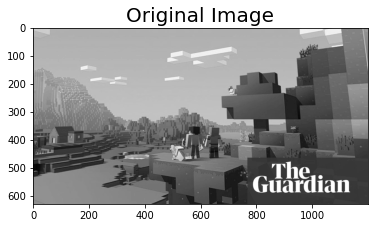

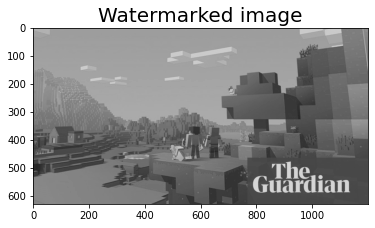

(<matplotlib.image.AxesImage at 0x7f7ff08b8350>,
 Text(0.5, 1.0, 'Watermarked image'),
 None)

In [41]:
zigzaag_copy_inverse = i_zigzag(zigzaag_copy,630,1200)
zigzaag_inverse = i_zigzag(zigzaag,630,1200)
zigzaag_copy_idct = idct2(zigzaag_copy_inverse)
zigzaag_inverse_idct = idct2(zigzaag_inverse)

plt.figure()
plt.imshow(zigzaag_inverse_idct), plt.title('Original Image', size=20),plt.show()
plt.imshow(zigzaag_copy_idct),plt.title('Watermarked image', size=20),plt.show()

# cv2_imshow(zigzaag_idct1)
# # cv2_imshow(zigzaag_copy_inverse_idct1)

In [42]:
print("PSNR", cv2.PSNR(zigzaag_inverse_idct,zigzaag_copy_idct), "dB")

PSNR 20.209865845602046 dB


In [ ]:
# original = np.ceil(zigzaag_inverse_idct)
# original = original.astype(numpy.uint8)
# watermarked = np.ceil(zigzaag_copy_idct)
# watermarked=watermarked.astype(numpy.uint8)
# print("PSNR ",cv2.PSNR(original, watermarked),"dB")

In [71]:
def decryption(received_image,key):
  dct = dct2(received_image)
  print(dct.shape)

  dct_zigzag = zigzag(dct)
  print(dct_zigzag.shape)

  locations_partioning = []

  for i in range(0,32):
    locations_partioning.append(2047+(4096*i))
  x = locations_partioning[-1]
  for i in range(0,256):
    locations_partioning.append(x+512+(1024*i))
  x = locations_partioning[-1]
  for i in range(0,512):
    locations_partioning.append(x+128+(256*i))
  x = locations_partioning[-1]
  for i in range(0,2048):
    locations_partioning.append(x+32+(64*i))
  x = locations_partioning[-1]  
  for i in range(0,2048):
    locations_partioning.append(x+8+(16*i))
  x = locations_partioning[-1]
  for i in range(0,4096):
    locations_partioning.append(x+2+(4*i))
  x = locations_partioning[-1]
  for i in range(x,dct_zigzag.shape[0]):
    locations_partioning.append(i)
  
  print(height,width)
  import random
  random.seed(key)
  random.shuffle(locations_partioning)
  #locations_partioning = np.random.permutation(locations_partioning)
  #print(locations_partioning[:100])
  # height_ = int(np.ceil(dct_zigzag[locations_partioning[0]]))
  # width_ = int(np.ceil(dct_zigzag[locations_partioning[1]]))
  # print(height_,width_)
  watermark_dct_zigzag = np.zeros(52*150)
  for i in range(0,52*150):
    if(locations_partioning[i+2]>=dct_zigzag.shape[0]):
      watermark_dct_zigzag[i]=0
    else:
      index = locations_partioning[i+2]
      watermark_dct_zigzag[i] = dct_zigzag[index]
  
  w_dct_zig = watermark_dct_zigzag.copy()
  w_dct_zigzag = i_zigzag(w_dct_zig,52,150)
  w_mark = idct2(w_dct_zigzag)

  # return watermark_dct_zigzag
  return w_mark



In [58]:
received_image = zigzaag_copy_idct.copy()

(630, 1200)
(756000,)
52 150
52 150


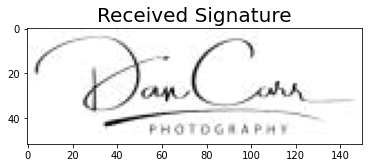

Co-relation coefficients


array([[1., 1.],
       [1., 1.]])

In [63]:
w_mark = decryption(received_image.copy(),123)
plt.figure()
plt.imshow(w_mark), plt.title('Received Signature', size=20),plt.show()
print("Co-relation coefficients")
np.corrcoef(w_mark.reshape(-1),mkr_idct.reshape(-1))

# Rotation Attack

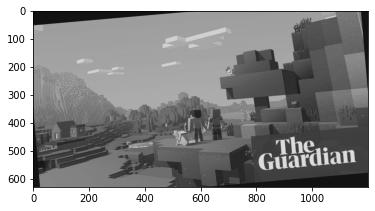

(<matplotlib.image.AxesImage at 0x7f7ff08129d0>, None)

In [64]:
#from scipy import ndimage
import imutils 
cvw_rotated = imutils.rotate(received_image.copy(), angle=5)
plt.figure()
plt.imshow(cvw_rotated),plt.show()

(630, 1200)
(756000,)
52 150
4 2


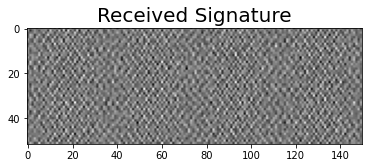

Co-relation coefficients


array([[ 1.        , -0.00982649],
       [-0.00982649,  1.        ]])

In [66]:
r_w_mark = decryption(cvw_rotated,123)
plt.figure()
plt.imshow(r_w_mark), plt.title('Received Signature', size=20),plt.show()
print("Co-relation coefficients")
np.corrcoef(r_w_mark.reshape(-1),mkr_idct.reshape(-1))

# Cropping

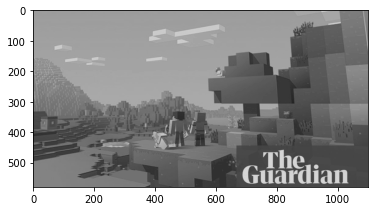

(<matplotlib.image.AxesImage at 0x7f7ff05f7cd0>, None)

In [67]:
cvw_cropped = received_image.copy()[20:600,100:1200]
plt.imshow(cvw_cropped),plt.show()

(580, 1100)
(638000,)
52 150


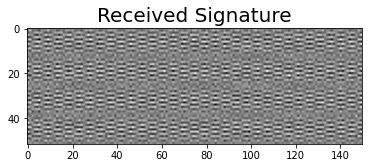

Co-relation coefficients


array([[1.        , 0.00232999],
       [0.00232999, 1.        ]])

In [72]:
c_w_mark = decryption(cvw_cropped,123)
plt.figure()
plt.imshow(c_w_mark), plt.title('Received Signature', size=20),plt.show()
print("Co-relation coefficients")
np.corrcoef(c_w_mark.reshape(-1),mkr_idct.reshape(-1))

#Scaling

Resized Dimensions :  (598, 1140)


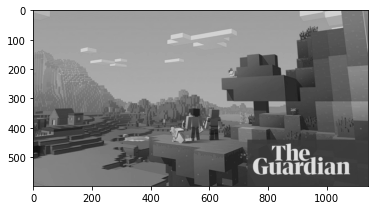

(<matplotlib.image.AxesImage at 0x7f7ff011ec50>, None)

In [73]:
scale_percent = 95 # percent of original size
width_1 = int(received_image.copy().shape[1] * scale_percent / 100)
height_1 = int(received_image.copy().shape[0] * scale_percent / 100)
dim = (width_1, height_1)
  
# resize image
resized = cv2.resize(received_image.copy(), dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized.shape)

plt.imshow(resized),plt.show()

(598, 1140)
(681720,)
52 150


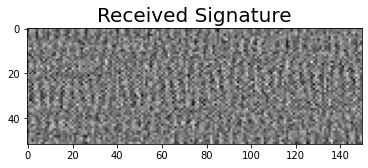

Co-relation coefficients


array([[ 1.        , -0.00812392],
       [-0.00812392,  1.        ]])

In [74]:
s_w_mark = decryption(resized,123)
plt.figure()
plt.imshow(s_w_mark), plt.title('Received Signature', size=20),plt.show()
print("Co-relation coefficients")
np.corrcoef(s_w_mark.reshape(-1),mkr_idct.reshape(-1))

# Gaussian Noise

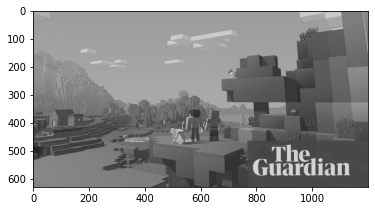

(<matplotlib.image.AxesImage at 0x7f7ff00bb490>, None)

In [75]:
# adding guassian noise

noise = np.random.normal(0, 1, (received_image.copy().shape[0], received_image.copy().shape[1]))

noisy = received_image.copy() + noise

plt.figure()
plt.gray()
plt.imshow(noisy),plt.show()

(630, 1200)
(756000,)
52 150


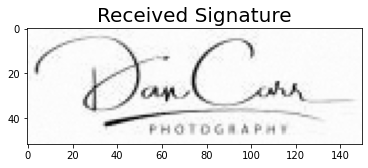

Co-relation coefficients


array([[1.        , 0.99965918],
       [0.99965918, 1.        ]])

In [76]:
n_w_mark = decryption(noisy,123)
plt.figure()
plt.imshow(n_w_mark), plt.title('Received Signature', size=20),plt.show()
print("Co-relation coefficients")
np.corrcoef(n_w_mark.reshape(-1),mkr_idct.reshape(-1))

#median filtering attack



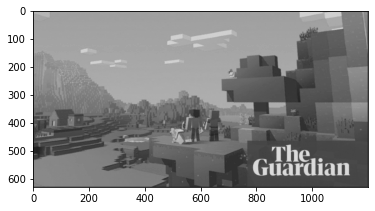

(<matplotlib.image.AxesImage at 0x7f7feff97790>, None)

In [77]:
median_filtered_image = np.zeros([received_image.copy().shape[0], received_image.copy().shape[1]]) 
img_rec = received_image.copy()
for i in range(1, received_image.copy().shape[0]-1): 
    for j in range(1, received_image.copy().shape[1]-1): 
        block = [img_rec[i-1, j-1], 
               img_rec[i-1, j], 
               img_rec[i-1, j + 1], 
               img_rec[i, j-1], 
               img_rec[i, j], 
               img_rec[i, j + 1], 
               img_rec[i + 1, j-1], 
               img_rec[i + 1, j], 
               img_rec[i + 1, j + 1]] 
          
        block = sorted(block) 
        median_filtered_image[i, j]= block[4] 
plt.figure()
plt.gray()
plt.imshow(median_filtered_image),plt.show()

(630, 1200)
(756000,)
52 150


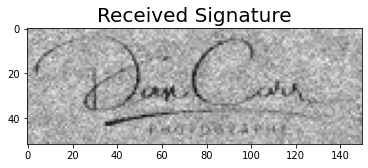

Co-relation coefficients


array([[1.        , 0.73409364],
       [0.73409364, 1.        ]])

In [78]:
m_w_mark = decryption(median_filtered_image,123)
plt.figure()
plt.imshow(m_w_mark), plt.title('Received Signature', size=20),plt.show()
print("Co-relation coefficients")
np.corrcoef(m_w_mark.reshape(-1),mkr_idct.reshape(-1))

# Average Filter Attack

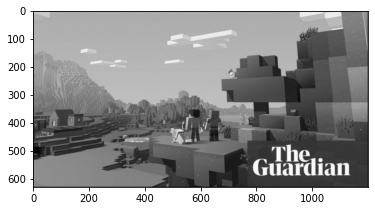

(<matplotlib.image.AxesImage at 0x7f7ff0573110>, None)

In [79]:
mask = np.ones([3, 3], dtype = int) 
mask = mask / 9
   
# Convolve the 3X3 mask over the image  
average_filtered_image = np.zeros([received_image.copy().shape[0], received_image.copy().shape[1]]) 

img = received_image.copy()

for i in range(1, received_image.copy().shape[0]-1): 
    for j in range(1, received_image.copy().shape[1]-1): 
        convolution = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2] 
         
        average_filtered_image[i, j]= convolution 

plt.figure()
plt.gray()
plt.imshow(average_filtered_image),plt.show()

(630, 1200)
(756000,)
52 150


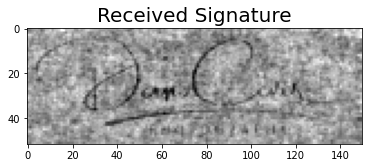

Co-relation coefficients


array([[1.        , 0.57994413],
       [0.57994413, 1.        ]])

In [80]:
a_w_mark = decryption(average_filtered_image,123)
plt.figure()
plt.imshow(a_w_mark), plt.title('Received Signature', size=20),plt.show()
print("Co-relation coefficients")
np.corrcoef(a_w_mark.reshape(-1),mkr_idct.reshape(-1))

In [ ]:
import math
def normalised_corerelation(source,received):
  x = source.copy()
  y = received.copy()
  x = (x - np.mean(x)) / np.std(x)
  y = (y - np.mean(y)) / np.std(y)
  num = 0
  den_1 = 0
  den_2 = 0
  for i in range(0,x.shape[0]):
    for j in range(0,x.shape[1]):
      num = num + ( (x[i][j] * y[i][j]) )
      den_1 = den_1 + ( x[i][j] * x[i][j] )
      den_2 = den_2 + ( y[i][j] * y[i][j])
  
  coeff = num / math.sqrt(den_1*den_2)
  return coeff

In [ ]:
print(normalised_corerelation(a_w_mark,mkr_idct))

0.5795486358770476
